In [2]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [5]:
f_full = '/Volumes/UBooNEDataMCC8/MCC8_2/Efficiency/MCVars_full.root'
f_sel2 = '/Volumes/UBooNEDataMCC8/MCC8_2/Efficiency/MCVars_sel2.root'
f_rc = '/Volumes/UBooNEDataMCC8/MCC8_2/Efficiency/MCVars_ratio.root'
f_pc = '/Volumes/UBooNEDataMCC8/MCC8_2/Efficiency/MCVars_pi0.root'

a_full = rn.root2array(f_full,treename='pi0_tree')
a_sel2 = rn.root2array(f_sel2,treename='pi0_tree')
a_rc = rn.root2array(f_rc,treename='pi0_tree')
a_pc = rn.root2array(f_pc,treename='pi0_tree')

df_full = pd.DataFrame(a_full)
df_sel2 = pd.DataFrame(a_sel2)
df_rc = pd.DataFrame(a_rc)
df_pc = pd.DataFrame(a_pc)

In [6]:
df_full.head()

,true_pi0_e,true_angle,true_asym,reco_pi0_e,true_pi0_mom,true_gamma_e_min,true_gamma_e_max,true_RL_maxE,true_RL_minE,true_nu_e,true_mu_mom,true_mu_len,true_mu_theta,true_mu_phi,event
0,202.126709,2.387521,0.179387,-999.0,150.451340,30.743450,171.380981,106.244102,7.111246,0.922622,579.433533,185.092896,0.365230,0.919209,1073741824
1,185.768585,1.906851,0.375672,-999.0,127.633720,50.729485,135.036636,9.693301,6.651888,1.185024,582.680603,210.190674,0.649000,-1.287647,1106247680
2,1062.791748,0.264940,0.569000,-999.0,1054.185303,385.422913,677.368347,38.045124,17.842146,1.659600,272.581024,68.154808,1.222031,2.394143,1121714176
3,208.885605,2.392619,0.163003,-999.0,159.416428,29.276468,179.606934,89.669319,0.697521,0.933298,307.554657,86.863235,1.430095,-2.956397,1131937792
4,188.046387,1.601411,0.975596,-999.0,130.926865,92.860550,95.183403,6.139203,15.042186,0.750084,115.388985,11.137944,2.298759,-0.853172,1132134400


In [9]:
mom_full, bin_full = np.histogram(df_full.true_pi0_mom.values,bins=20,\
                                 range=(0,1500))
bins = (bin_full[:-1] + bin_full[1:])/2
err_effx = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(mom_full)

# Now take care of ratio and pi0 cuts
mom_sel2, bin_sel2 = np.histogram(df_sel2.true_pi0_mom.values,bins=20,\
                                 range=(0,1500))
err_sel2_y = np.sqrt(mom_sel2)

mom_rc, bin_rc = np.histogram(df_rc.true_pi0_mom.values,bins=20,\
                             range=(0,1500))
err_rc_y = np.sqrt(mom_rc)

mom_pc, bin_pc = np.histogram(df_pc.true_pi0_mom.values,bins=20,\
                             range=(0,1500))
err_pc_y = np.sqrt(mom_pc)

mom_b = mom_full
# Efficiency
sel2_eff = [float(mom_sel2[i])/mom_b[i] if mom_b[i] != 0. else 0. for i in xrange(len(mom_sel2))]
rc_eff = [float(mom_rc[i])/mom_b[i] if mom_b[i] != 0. else 0. for i in xrange(len(mom_rc))]
pc_eff = [float(mom_pc[i])/mom_b[i] if mom_b[i] != 0. else 0. for i in xrange(len(mom_pc))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./mom_sel2[i] + 1./mom_b[i]) \
            if mom_b[i] != 0. and sel2_eff[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./mom_rc[i] + 1./mom_b[i]) \
            if mom_b[i] != 0. and rc_eff[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./mom_pc[i] + 1./mom_b[i]) \
            if mom_b[i] != 0. and pc_eff[i] !=0 else 0. \
            for i in xrange(len(bins))]

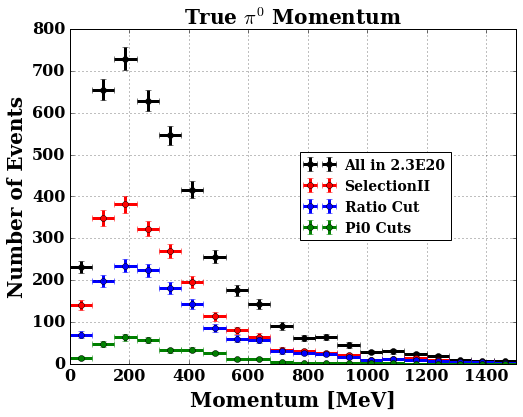

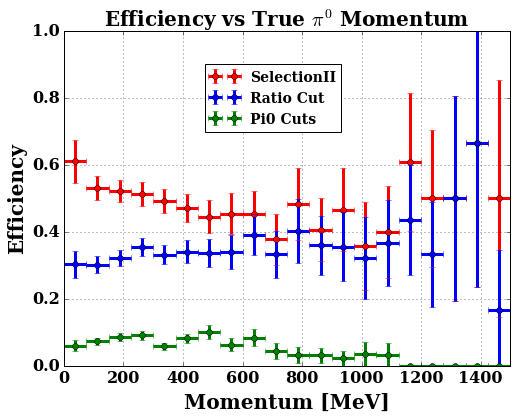

In [10]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,mom_full,yerr=err_full_y,xerr=err_effx,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,mom_sel2,yerr=err_sel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,mom_rc,yerr=err_rc_y,xerr=err_effx,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,mom_pc,yerr=err_pc_y,xerr=err_effx,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True $\pi^0$ Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Number of Events',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.5,0.5),fontsize=14)
plt.xlim(0,1500)
plt.savefig('Plots/MCVar_Pi0Mom.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_effx,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_effx,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_effx,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Efficiency vs True $\pi^0$ Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.xlim(0,1500)
#plt.yscale('log')
plt.savefig('Plots/MCVar_Pi0MomEff.png')


In [11]:
var = 'true_angle'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,3.2))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,3.2))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,3.2))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,3.2))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


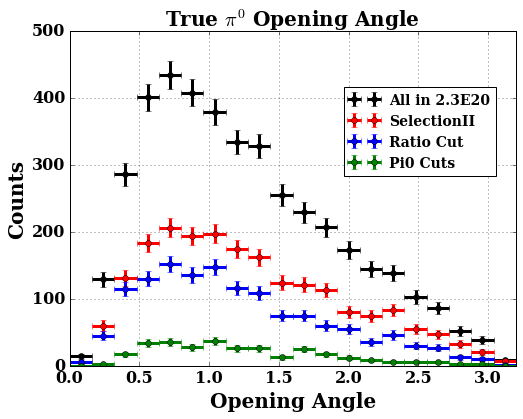

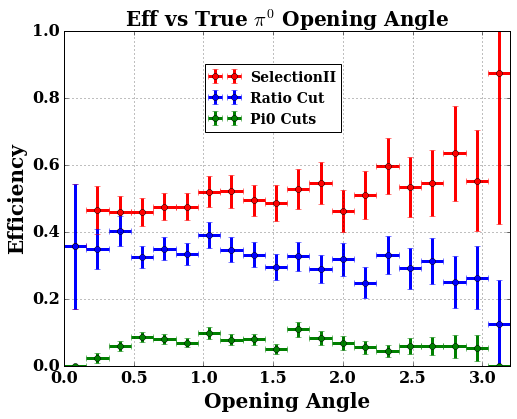

In [12]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True $\pi^0$ Opening Angle',fontsize=20,weight='bold')
plt.xlabel('Opening Angle',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.6,0.7),fontsize=14)
plt.xlim(0,3.2)
plt.savefig('Plots/MCVar_Pi0OAngle.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Eff vs True $\pi^0$ Opening Angle',fontsize=20,weight='bold')
plt.xlabel('Opening Angle',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.0)
plt.xlim(0,3.2)
plt.savefig('Plots/MCVar_Pi0OAngleEff.png')

In [13]:
var = 'true_nu_e'

n = 30 #100
full_v, bins_full = np.histogram(df_full[var].values,bins=n,range=(0.2,7.))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=n,range=(0.2,7))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=n,range=(0.2,7.))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=n,range=(0.2,7.))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


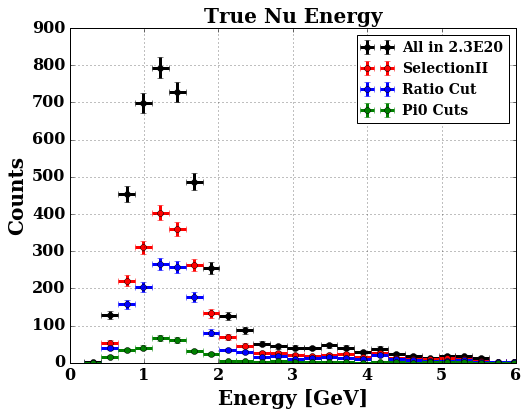

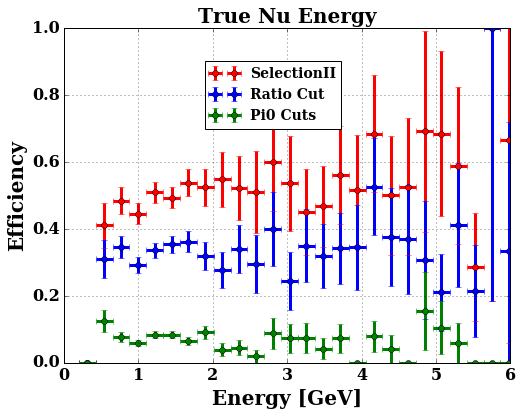

In [14]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Nu Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
plt.xlim(0.,6)
plt.savefig('Plots/MCVar_NuEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Nu Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0.,1.)
plt.xlim(0,6) #0.3,0.7)
plt.savefig('Plots/MCVar_NuEnergyEff.png')

In [15]:
var = 'true_gamma_e_max'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,1000))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,1000))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,1000))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,1000))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


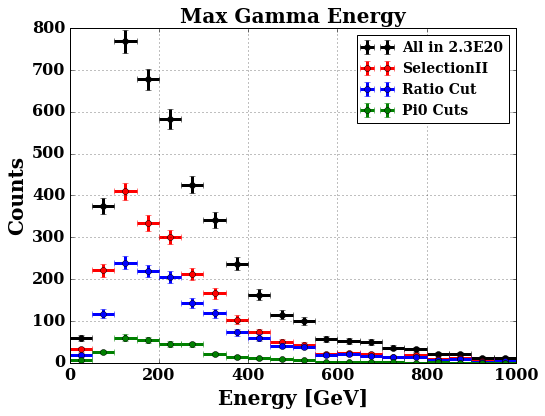

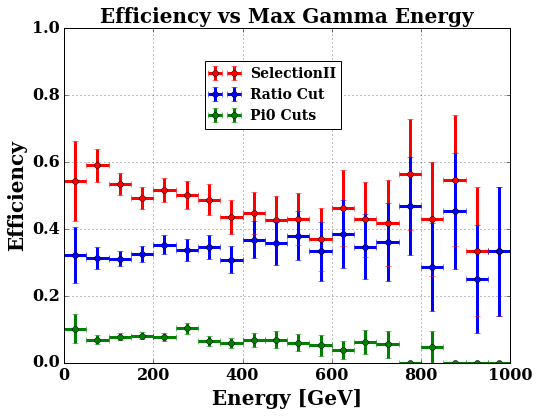

In [16]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_GammaMaxEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Efficiency vs Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_GammaMaxEnergyEff.png')

In [17]:
var = 'true_gamma_e_min'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,400))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,400))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,400))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,400))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]


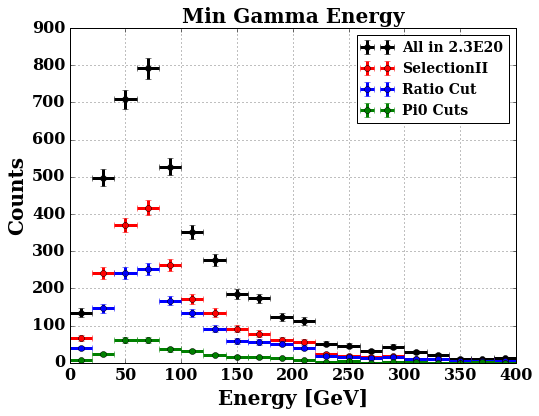

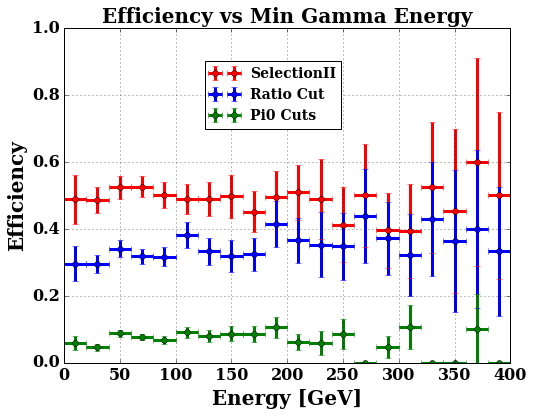

In [18]:
plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_GammaMinEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Efficiency vs Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_GammaMinEnergyEff.png')

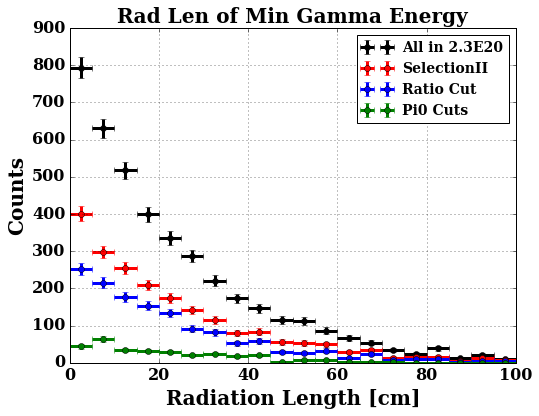

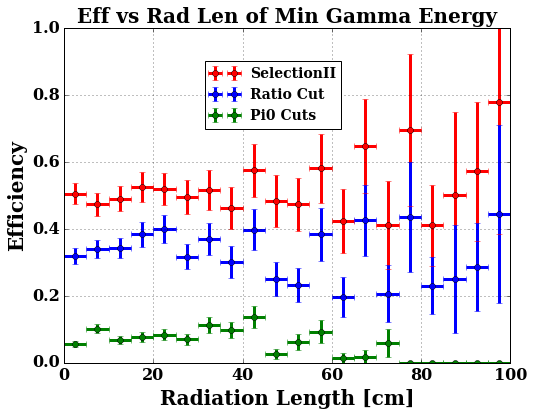

In [19]:
var = 'true_RL_minE'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,100))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,100))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,100))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,100))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Rad Len of Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_RLMinEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Eff vs Rad Len of Min Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_RLMinEnergyEff.png')

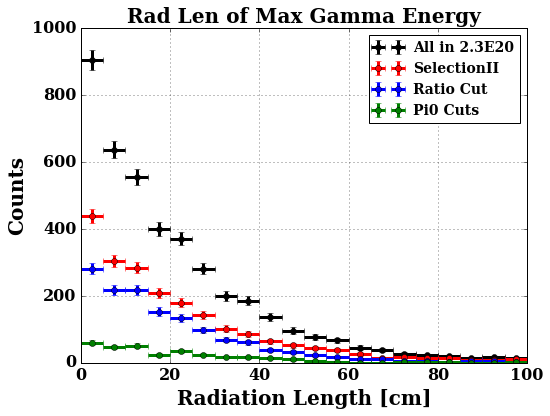

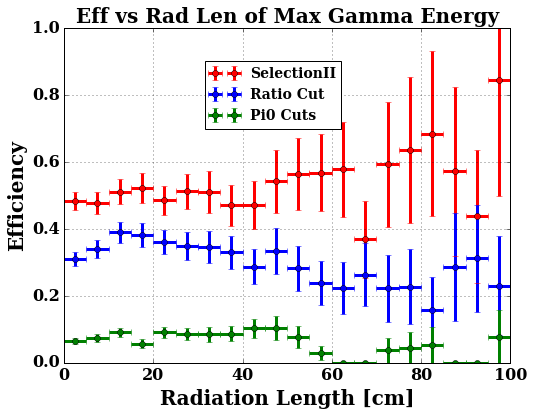

In [20]:
var = 'true_RL_maxE'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,100))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,100))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,100))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,100))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Rad Len of Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_RLMaxEnergy.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('Eff vs Rad Len of Max Gamma Energy',fontsize=20,weight='bold')
plt.xlabel('Radiation Length [cm]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.savefig('Plots/MCVar_RLMaxEnergyEff.png')

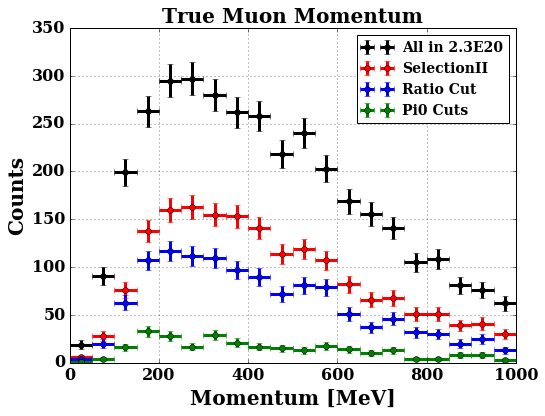

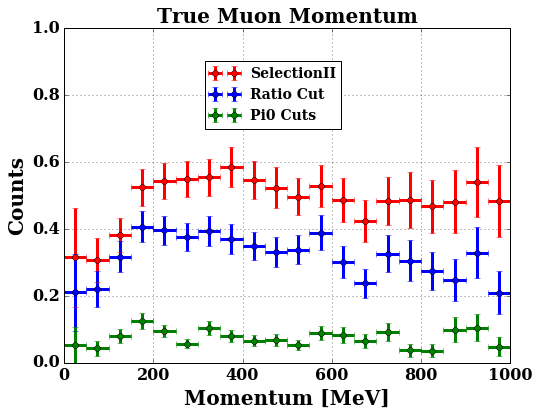

In [21]:
var = 'true_mu_mom'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,1000))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,1000))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,1000))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,1000))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_MuMom.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.savefig('Plots/MCVar_MuMomEff.png')


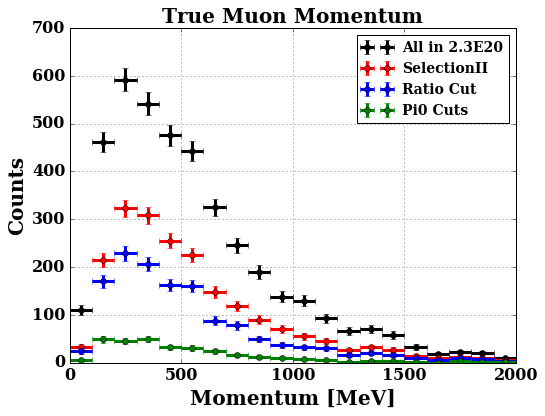

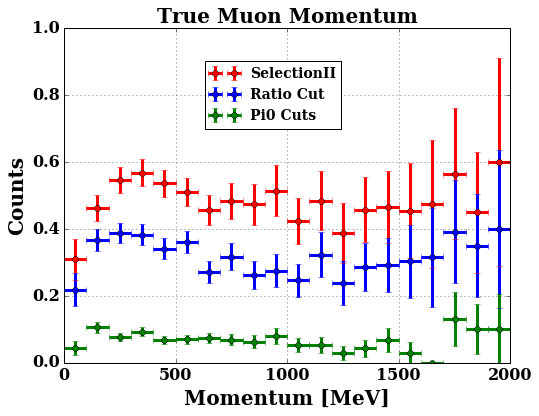

In [25]:
var = 'true_mu_mom'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,2000))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,2000))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,2000))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,2000))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
#plt.xlim(0,2.5)
plt.savefig('Plots/MCVar_MuMom.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon Momentum',fontsize=20,weight='bold')
plt.xlabel('Momentum [MeV]',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.savefig('Plots/MCVar_MuMomEff.png')


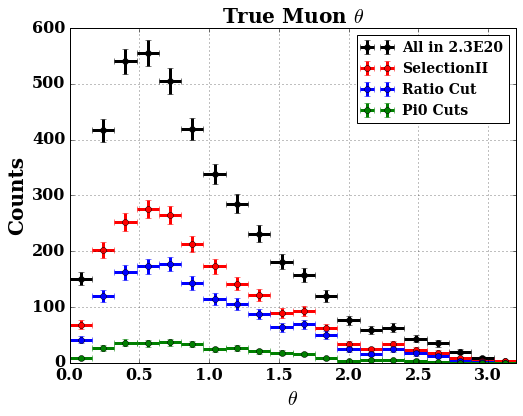

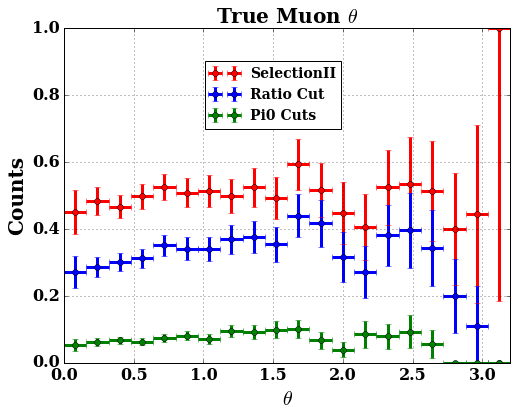

In [27]:
var = 'true_mu_theta'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,3.2))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,3.2))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,3.2))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,3.2))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon $\\theta$',fontsize=20,weight='bold')
plt.xlabel('$\\theta$',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(fontsize=14)
plt.xlim(0,3.2)
plt.savefig('Plots/MCVar_MuTheta.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon $\\theta$',fontsize=20,weight='bold')
plt.xlabel('$\\theta$',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.xlim(0,3.2)
plt.savefig('Plots/MCVar_MuThetaEff.png')


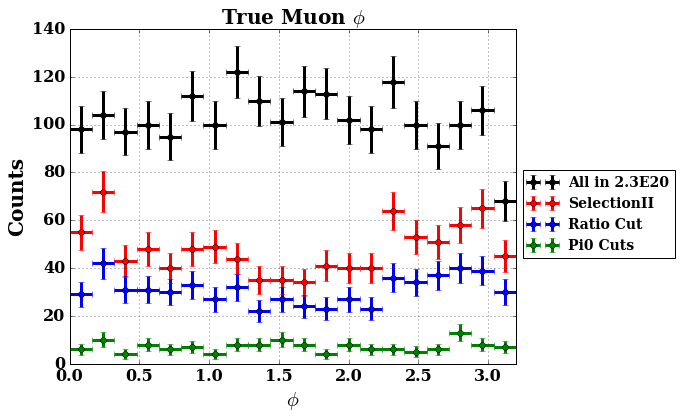

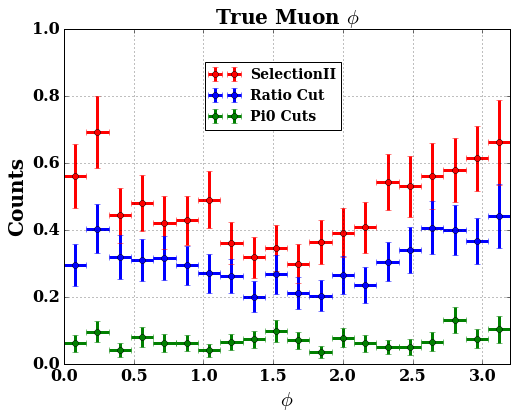

In [29]:
var = 'true_mu_phi'

full_v, bins_full = np.histogram(df_full[var].values,bins=20,range=(0,3.2))
bins = (bins_full[:-1] + bins_full[1:])/2
err_full_x = 0.5 * (bins[1] - bins[0])
err_full_y = np.sqrt(full_v)

# Now take care of ratio and pi0 cuts
sel2_v, bin_sel2 = np.histogram(df_sel2[var].values,bins=20,range=(0,3.2))
err_sel2_y = np.sqrt(sel2_v)

rc_v, bin_rc = np.histogram(df_rc[var].values,bins=20,range=(0,3.2))
err_rc_y = np.sqrt(rc_v)

pc_v, bin_pc = np.histogram(df_pc[var].values,bins=20,range=(0,3.2))
err_pc_y = np.sqrt(pc_v)

sel2_eff = [float(sel2_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(sel2_v))]
rc_eff = [float(rc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(rc_v))]
pc_eff = [float(pc_v[i])/full_v[i] if full_v[i] != 0. else 0. for i in xrange(len(pc_v))]

err_effsel2_y = [ sel2_eff[i] * math.sqrt(1./sel2_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and sel2_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effpc_y = [ pc_eff[i] * math.sqrt(1./pc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and pc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

err_effrc_y = [ rc_eff[i] * math.sqrt(1./rc_v[i] + 1./full_v[i]) \
            if full_v[i] != 0. and rc_v[i] !=0 else 0. \
            for i in xrange(len(bins))]

plt.figure(figsize=(8,6))
plt.errorbar(bins,full_v,yerr=err_full_y,xerr=err_full_x,fmt='o',color='k',lw=3,label='All in 2.3E20')
plt.errorbar(bins,sel2_v,yerr=err_sel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_v,yerr=err_rc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_v,yerr=err_pc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon $\\phi$',fontsize=20,weight='bold')
plt.xlabel('$\\phi$',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1,0.6),fontsize=14)
plt.xlim(0,3.2)
plt.savefig('Plots/MCVar_MuPhi.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins,sel2_eff,yerr=err_effsel2_y,xerr=err_full_x,fmt='o',color='r',lw=3,label='SelectionII')
plt.errorbar(bins,rc_eff,yerr=err_effrc_y,xerr=err_full_x,fmt='o',color='b',lw=3,label='Ratio Cut')
plt.errorbar(bins,pc_eff,yerr=err_effpc_y,xerr=err_full_x,fmt='o',color='g',lw=3,label='Pi0 Cuts')
plt.grid(True)
plt.title('True Muon $\\phi$',fontsize=20,weight='bold')
plt.xlabel('$\\phi$',fontsize=20,weight='bold')
plt.ylabel('Counts',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.3,0.8),fontsize=14)
plt.ylim(0,1.)
plt.xlim(0,3.2)
plt.savefig('Plots/MCVar_MuPhiEff.png')


In [4]:
232250./ 99035.2

2.345125773462365

In [142]:
df_full.head()

,true_pi0_e,true_angle,true_asym,reco_pi0_e,true_pi0_mom,true_gamma_e_min,true_gamma_e_max,true_RL_maxE,true_RL_minE,true_nu_e,event
0,197.737381,1.551643,0.634866,-999.0,144.500763,76.786301,120.948753,9.379167,21.500515,0.870884,1093664768
1,216.593658,1.379655,0.662842,-999.0,169.390701,86.337738,130.253799,13.233510,30.444183,0.986710,1105199104
2,434.957703,0.673049,0.490545,-999.0,413.483490,143.146210,291.810425,12.221223,3.903167,1.680696,1132396544
3,191.236328,1.602094,0.689131,-999.0,135.468582,78.019554,113.214378,14.724538,6.067541,0.630250,1133543424
4,143.066498,2.519908,0.763485,-999.0,47.417534,61.937984,81.125305,6.785769,40.631557,0.976972,1135542272


In [153]:
n = 6893

dn = math.sqrt(6893)

In [154]:
s = n /8.969e29/2.05e11
ds = dn /8.969e29/2.05e11

print s, "+-", ds

3.74895643259e-38 +- 4.51550423756e-40


In [161]:
n = (779 - 370.)/0.059335557
dn = math.sqrt(779 + 370)/0.059335557

s = n /8.969e29/2.05e11
ds = dn /8.969e29/2.05e11

print s, "+-", ds

3.74895648391e-38 +- 3.10704186949e-39


In [63]:
dn = math.sqrt(71 + 71*0.475)/8.969e29/.05933555781227332/2.5862650266e+10
print dn


7.43520768447e-39


In [64]:
print (71. - 71*0.475)/8.969e29/.05933555781227332/2.5862650266e+10
print (779 - 779*0.475)/8.969e29/.05933555781227332/2.05e11

3.73812051398e-38
3.74872727877e-38


In [179]:
541554./547616 * 3.1

3.0656836177175246

In [3]:
tot_on = 541554 #525613
tot_off = 218466 #379202
tot_bnbcos = 384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on



POTS :  0.489520448636 3.87942872837
MC to OnBeam :  0.126183642724
Off to OnBeam:  2.13091331027


In [22]:
# Separate MCC7 norm calculation
tot_on = 547541 #525613
tot_off = 220592 #379202
tot_bnbcos = 188000 #101600

scale_intime = 5.12 
int_per_1e20POT = 83048.6
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on


POTS :  0.494932206144 2.26373472882
MC to OnBeam :  0.218635249017
Off to OnBeam:  2.13370688102


In [42]:
on0 = 5988
off0 = 601 * 1.6/1.45
mc0 = 17333 * 1.6/1.35
#mc_to_onbeam *= 1.6/1.35


min0 = on0 - off0 * off_to_on
mcsc0 = mc0 * mc_to_onbeam
dd0 = math.sqrt(on0 + (off0*off_to_on))
dm0 = math.sqrt(mcsc0*mc_to_onbeam)

print
print "Final MC : ", mcsc0, " +- ", dm0
print "Final On : ", on0 , " +- ", math.sqrt(on0)
print "Final Off : ", off0*off_to_on , " +- ", math.sqrt(off0*off_to_on)
print "Final Off-On : ", min0, " +- ", dd0

on0 = 1808
off0 = 238* 1.6/1.45
mc0 = 4363

min0 = on0 - off0 * off_to_on
mcsc0 = mc0 * mc_to_onbeam
dd0 = math.sqrt(on0 + (off0*off_to_on))
dm0 = math.sqrt(mcsc0*mc_to_onbeam)

print
print "Final MC : ", mcsc0, " +- ", dm0
print "Final On : ", on0 , " +- ", math.sqrt(on0)
print "Final Off : ", off0*off_to_on , " +- ", math.sqrt(off0*off_to_on)
print "Final Off-On : ", min0, " +- ", dd0


on0 = 140
off0 = 9* 1.6/1.45
mc0 = 585

min0 = on0 - off0 * off_to_on
mcsc0 = mc0 * mc_to_onbeam
dd0 = math.sqrt(on0 + (off0*off_to_on))
dm0 = math.sqrt(mcsc0*mc_to_onbeam)

print
print "Final MC : ", mcsc0, " +- ", dm0
print "Final On : ", on0 , " +- ", math.sqrt(on0)
print "Final Off : ", off0*off_to_on , " +- ", math.sqrt(off0*off_to_on)
print "Final Off-On : ", min0, " +- ", dd0



Final MC :  4491.38343255  +-  31.3364761134
Final On :  5988  +-  77.3821684886
Final Off :  1415.01554261  +-  37.6166923401
Final Off-On :  4572.98445739  +-  86.0407783706

Final MC :  953.905591461  +-  14.4415160744
Final On :  1808  +-  42.5205832509
Final Off :  560.355572616  +-  23.6718307829
Final Off-On :  1247.64442738  +-  48.6657535914

Final MC :  127.901620675  +-  5.28808119132
Final On :  140  +-  11.8321595662
Final Off :  21.1899166115  +-  4.60325065704
Final Off-On :  118.810083388  +-  12.6960590977
